# CH13 PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dimensionality reduction
- 使数据集更容易使用
- 降低计算开销
- 去除噪声
- 使得结果容易理解

三种降维技术
- **主成分分析**（Principal Component Analysis）
- 因子分析(Factor Analysis)
- 独立成分分析(Independent Component Analysis)

## MLiA

### PCA

#### Raw data

##### Load Data

In [2]:
df = pd.read_table("./Data/CH13/testSet.txt",header=None)
df.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [3]:
df.describe()

,0,1
count,1000.000000,1000.000000
mean,9.063936,9.096002
std,1.025663,1.487167
min,5.985254,4.130251
25%,8.369062,8.147403
50%,9.030265,9.095864
75%,9.756880,10.126182
max,12.677687,13.901513


##### Visualization

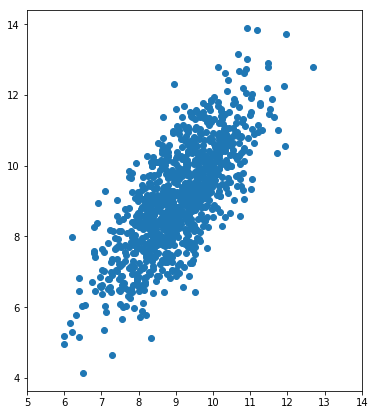

In [4]:
dataMat = df.values
plt.figure(figsize=(6,7))
plt.scatter(x=dataMat[:,0],y=dataMat[:,1])
plt.xlim(5,14)
plt.show()

#### PCA

##### Algorithm

In [5]:
def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    # 1 去掉均值B = A - Mean
    meanRemoved = dataMat - meanVals #remove mean
    # 2 计算协方差矩阵C = cov(B)
    covMat = np.cov(meanRemoved, rowvar=0)
    # 3 求特征值和特征向量
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
    # 4 降维 TopN
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [6]:
lowDMat, reconMat = pca(dataMat,1)

In [7]:
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

##### Visualization

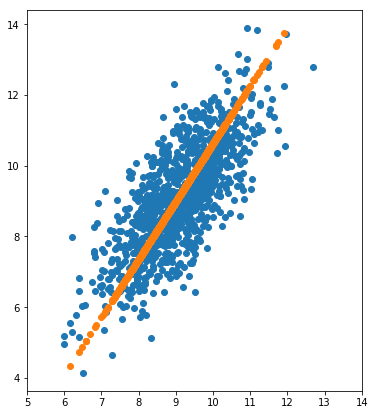

In [8]:
plt.figure(figsize=(6,7))
plt.scatter(x=dataMat[:,0],y=dataMat[:,1])
plt.scatter(x=reconMat.A[:,0],y=reconMat.A[:,1])
plt.xlim(5,14)
plt.show()

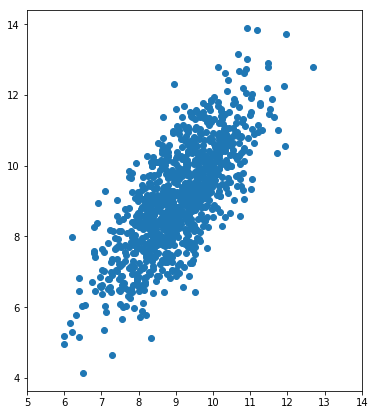

In [9]:
lowDMat, reconMat = pca(dataMat,2)
plt.figure(figsize=(6,7))
plt.scatter(x=reconMat.A[:,0],y=reconMat.A[:,1])
plt.xlim(5,14)
plt.show()

### EX : Secom

In [10]:
df = pd.read_csv("./Data/CH13/secom.data",sep=" ",header = None)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [13]:
df.fillna(dict(df.mean()),inplace=True)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,0.001956,54.936224,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,0.005396,91.549650,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,0.005396,97.934373,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,0.005396,97.934373,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [14]:
dataMat = df.values

In [15]:
meanVals = np.mean(dataMat,axis=0)

In [16]:
meanRemoved = dataMat - meanVals

In [17]:
covMat = np.cov(meanRemoved, rowvar=0)

In [18]:
covMat

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01, ...,
        -1.67440688e-02, -5.93197815e-03,  2.87879850e+01],
       [-8.47962623e+02,  6.43649877e+03,  1.35942679e+01, ...,
         1.21967287e-02,  2.32652705e-03,  3.37335304e+02],
       [ 1.02671010e+01,  1.35942679e+01,  8.63239193e+02, ...,
        -7.59126039e-03, -2.59521865e-03, -9.07023669e+01],
       ...,
       [-1.67440688e-02,  1.21967287e-02, -7.59126039e-03, ...,
         7.75231441e-05,  2.45865358e-05,  3.22979001e-01],
       [-5.93197815e-03,  2.32652705e-03, -2.59521865e-03, ...,
         2.45865358e-05,  8.21484994e-06,  1.04706789e-01],
       [ 2.87879850e+01,  3.37335304e+02, -9.07023669e+01, ...,
         3.22979001e-01,  1.04706789e-01,  8.81006310e+03]])

In [19]:
# 特征向量和特征值
eigVals, eigVects = np.linalg.eig(np.mat(covMat))

In [20]:
print(np.shape(eigVals),np.shape(eigVects))

(590,) (590, 590)


In [21]:
eigVals # 特征值

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

In [22]:
eigVects # 特征向量

matrix([[-6.39070760e-04, -1.20314234e-04,  1.22460363e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.35722934e-05, -6.60163227e-04,  1.71369126e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 2.36801459e-04,  1.58026311e-04,  3.28185512e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.61329351e-08, -6.06233975e-09,  1.09328336e-09, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.62597732e-09,  5.96647587e-09,  8.83024927e-09, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.89298443e-04, -2.32070657e-04,  7.13534990e-04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [23]:
np.shape(eigVects)

(590, 590)

In [24]:
np.var(eigVects)

0.0016947823435559456

方差占比


## Sklearn

In [25]:
import pandas as pd

In [26]:
df = pd.read_table("./Data/CH13/testSet.txt",header=None)
df.head()

,0,1
0,10.235186,11.321997
1,10.122339,11.810993
2,9.190236,8.904943
3,9.306371,9.847394
4,8.330131,8.340352


In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=1)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
lowDData  = pca.transform(df.values)

In [30]:
pca.get_covariance()

array([[1.05198368, 1.1246314 ],
       [1.1246314 , 2.21166499]])

In [31]:
pca.mean_

array([9.06393644, 9.09600218])

In [32]:
pca.n_components_

1

In [33]:
pca.singular_values_

array([53.79812098])

In [34]:
pca.explained_variance_ratio_

array([0.88769817])

In [35]:
pca.explained_variance_

array([2.89713496])

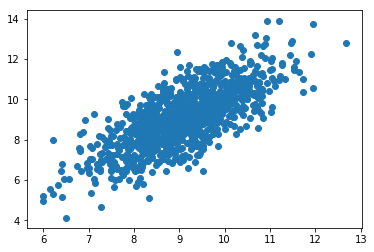

In [36]:
plt.scatter(df.values[:,0],df.values[:,1])
plt.show()

In [37]:
eigVals,eigVects = np.linalg.eig(pca.get_covariance())

In [38]:
eigVals

array([0.36651371, 2.89713496])

In [39]:
eigVects

array([[-0.85389096, -0.52045195],
       [ 0.52045195, -0.85389096]])

In [40]:
df = pd.read_csv("./Data/CH13/secom.data",sep=" ",header = None)

In [41]:
df.fillna(0,inplace=True)

In [42]:
pca = PCA(n_components=20)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.explained_variance_ratio_

array([0.5739377 , 0.23371987, 0.08860884, 0.0284086 , 0.0225041 ,
       0.01415206, 0.0050246 , 0.00339362, 0.00312535, 0.00267127,
       0.00237311, 0.00221713, 0.0020341 , 0.00122493, 0.00118809,
       0.00116822, 0.001105  , 0.00107853, 0.0009015 , 0.00087692])

In [44]:
pca.components_

array([[ 3.57776426e-04,  6.71768265e-04, -8.18091376e-04, ...,
        -2.45648517e-08, -5.12047004e-09, -3.74874303e-04],
       [ 9.46130623e-04,  2.16933526e-04,  1.04700673e-03, ...,
         8.71623794e-09, -5.09177368e-09,  2.49819927e-04],
       [-9.68943614e-04, -4.58426520e-03, -1.18983547e-03, ...,
        -1.83885876e-09, -9.03358873e-09, -7.47935285e-04],
       ...,
       [ 2.92539427e-02,  3.60350127e-02, -1.25417264e-02, ...,
        -8.09856086e-07, -3.03029311e-07, -1.47424764e-02],
       [ 1.57437148e-02,  2.18636298e-02, -3.09023491e-02, ...,
         4.27015893e-07,  1.66015813e-07,  1.17356973e-03],
       [-3.44591353e-04,  9.25199049e-04,  4.31525403e-02, ...,
         9.77015671e-07,  3.01720397e-07, -2.40081651e-03]])

In [45]:
pca.get_covariance()

array([[ 2.49650164e+03, -1.15545742e+01,  2.27160379e+02, ...,
        -1.40719029e-03, -4.78359655e-04, -1.62573020e+02],
       [-1.15545742e+01,  2.42414416e+03, -8.34155043e+01, ...,
        -3.33685037e-03, -7.19634606e-04, -1.42855012e+01],
       [ 2.27160379e+02, -8.34155043e+01,  9.23628279e+03, ...,
        -2.10953837e-02, -6.79973696e-03, -6.18741956e+02],
       ...,
       [-1.40719029e-03, -3.33685037e-03, -2.10953837e-02, ...,
         1.68090986e+03,  2.83609696e-07,  4.19659622e-03],
       [-4.78359655e-04, -7.19634606e-04, -6.79973696e-03, ...,
         2.83609696e-07,  1.68090986e+03,  1.42618657e-03],
       [-1.62573020e+02, -1.42855012e+01, -6.18741956e+02, ...,
         4.19659622e-03,  1.42618657e-03,  1.99448694e+03]])

### OneClass

In [46]:
from sklearn import svm
from sklearn import metrics

In [47]:
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma=3.8)
X = pd.read_csv("./Data/CH13/secom.data",sep=" ",header = None)
y = pd.read_csv("./Data/CH13/secom_labels.data",sep=" ",header = None)
X.fillna(0,inplace=True)
clf.fit(X[y[0]==1].values)
y_pred = clf.predict(X.values)
y["y_pred"] = y_pred
print("F1 Score: ", metrics.f1_score(y[0],y["y_pred"]), "ACC:", metrics.accuracy_score(y[0],y["y_pred"]))

F1 Score:  0.8695652173913044 ACC: 0.98468410976388


In [49]:
metrics.auc(y["y_pred"],y[0],reorder=True)

2.0

In [50]:
metrics.roc_curve(y_true=y[0],y_score=y["y_pred"])

(array([0., 1.]),
 array([0.76923077, 1.        ]),
 array([ 1, -1], dtype=int64))

### IForest

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
iF = IsolationForest(max_samples=20, random_state=0)
iF.fit(X[y[0]==1].values)
y_pred = iF.predict(X.values)
y["y_pred"] = y_pred
metrics.accuracy_score(y[0],y["y_pred"])

0.14932992980216975

In [53]:
metrics.accuracy_score(y[y[0]==1][0],y[y[0]==1]["y_pred"] )

0.8942307692307693

### SVC

In [54]:
from sklearn.cross_validation import train_test_split

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
clf = svm.SVC(kernel="rbf", gamma=0.2)
X = pd.read_csv("./Data/CH13/secom.data",sep=" ",header = None)
y = pd.read_csv("./Data/CH13/secom_labels.data",sep=" ",header = None)
X.fillna(0,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X.values,y[0].values,test_size=0.3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,y_pred), "ACC:", metrics.accuracy_score(y_test,y_pred))

F1 Score:  0.0 ACC: 0.9384288747346072


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Other

### iris

In [57]:
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [148]:
# 了解一下数据集
X.shape, y.shape

((150, 4), (150,))

In [149]:
# 生成数据集选择list
from itertools import combinations
combins = [c for c in  combinations(range(4), 3)]
for c in combins:
    print(list(c))

[0, 1, 2]
[0, 1, 3]
[0, 2, 3]
[1, 2, 3]


In [150]:
# 可视化
from pyecharts import Scatter3D, Grid
names = iris.target_names
# 更改索引看不同的特征选择
feas = combins[0]
target = y
scatter3D_ = Scatter3D("", width=300, height=300)
scatter3D_.use_theme("dark")
data = []
for idx in range(3):
    data = X[target == idx][:, feas]
    scatter3D_.add(names[idx], data)
scatter3D_

1. 可以尝试注释部分的不同的组合, 旋转坐标轴看在不同组合的空间里，大概这些类别是可以分开的
1. 思考两个问题：
    1. 是不是可以把数据的维度降低到3或者更少
    1. 有没有量化的指标可以代替我们可视化的这个过程。
